In [1]:
import voyageai
import os
import json

directory_path = "./chats/"

# List to hold the content of each file as a string
texts = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a text file
    if filename.endswith('.txt'):
        # Construct full file path
        file_path = os.path.join(directory_path, filename)
        # Open and read the file
        with open(file_path, 'r') as file:
            file_content = file.read()
            # Find the start and end of the JSON object
            start_index = file_content.find("[")
            end_index = file_content.rfind("]") + 1

            # Extract the JSON object
            json_string = file_content[start_index:end_index]

            texts.append(json_string)

# Now 'texts' contains the contents of all text files in the 'chats/' directory
print(len(texts))

/Users/sheikheddy/Projects/SPAR/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


198


Calculating text lengths: 100%|██████████| 198/198 [00:00<00:00, 485088.90it/s]


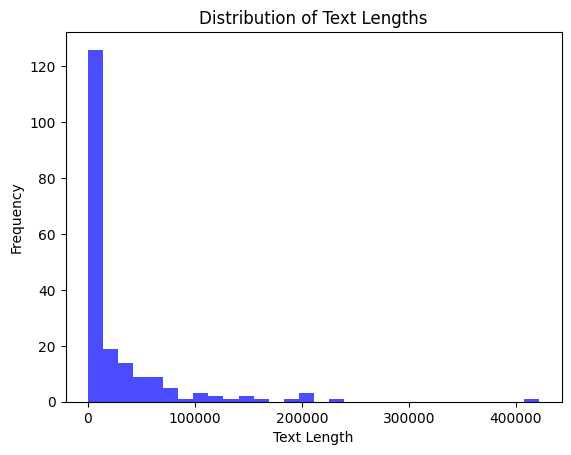

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in tqdm(texts, desc="Calculating text lengths")]

plt.hist(text_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [4]:

# Find the name of the text file with the maximum length
max_length = max(text_lengths)
index_of_max_length = text_lengths.index(max_length)

# Get the filename from the directory listing
max_length_filename = [filename for filename in os.listdir(directory_path) if filename.endswith('.txt')][index_of_max_length]

print("The name of the text file with the maximum length is:", max_length_filename)


The name of the text file with the maximum length is: Untitled - 2024-03-21 9:39:26.txt


In [ ]:
from transformers import AutoTokenizer
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

vo = voyageai.Client()
# This will automatically use the environment variable VOYAGE_API_KEY.
# Alternatively, you can use vo = voyageai.Client(api_key="<your secret key>")

tokenizer = AutoTokenizer.from_pretrained("voyageai/voyage")
tokenized = vo.tokenize(texts)

token_lengths = [len(tokenizer.tokenize(text)) for text in tqdm(texts, desc="Calculating token lengths")]

plt.hist(token_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [1]:
import numpy as np
# Load the embeddings from the .npy file
loaded_vectors = np.load('result.npy')

print(f"Loaded embeddings shape: {loaded_vectors.shape}")


Loaded embeddings shape: (120, 1536)


/var/folders/bs/tpqq04sd2fsfll6gbhxy7ngw0000gn/T/ipykernel_53877/3220075305.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embeddings_2d[labels == i, 0], embeddings_2d[labels == i, 1],


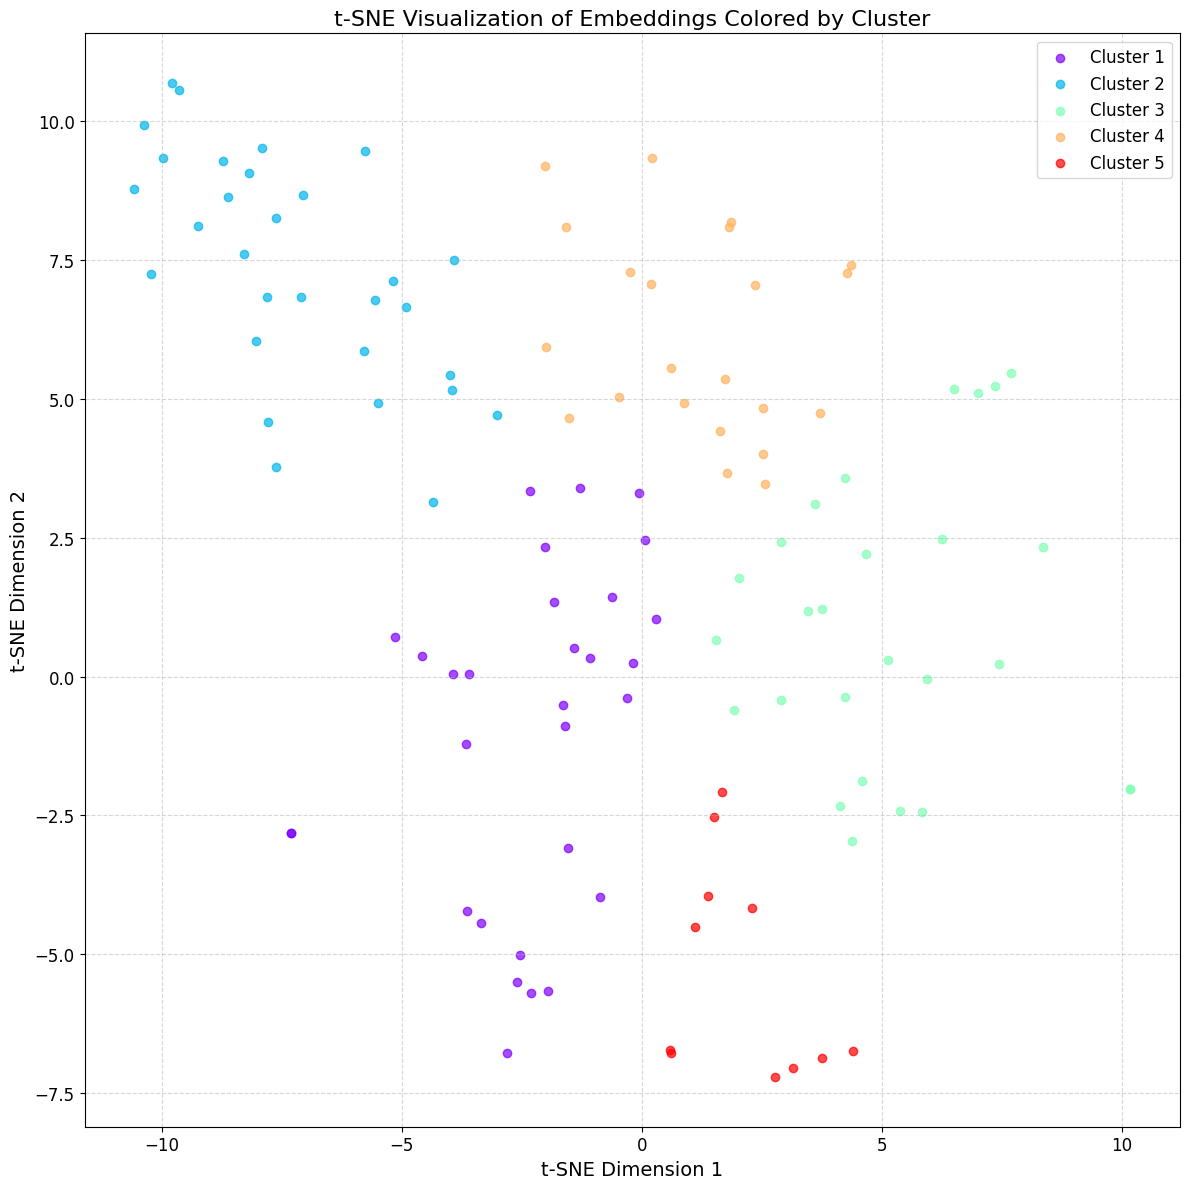

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'loaded_vectors' is your embeddings loaded from a .npy file
tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
embeddings_2d = tsne.fit_transform(loaded_vectors)

# Perform clustering using Agglomerative Clustering
distance_threshold = 20.0  # Set a distance threshold for clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward', compute_full_tree=True).fit(embeddings_2d)
labels = clustering.labels_

# Generate a colormap based on cluster labels
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(12, 12))
for i in range(n_clusters):
    plt.scatter(embeddings_2d[labels == i, 0], embeddings_2d[labels == i, 1], 
                c=colors[i], label=f'Cluster {i+1}', alpha=0.7)
plt.title('t-SNE Visualization of Embeddings Colored by Cluster', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'loaded_vectors' is your embeddings loaded from a .npy file
tsne = TSNE(n_components=3, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
embeddings_3d = tsne.fit_transform(loaded_vectors)

# Perform clustering using Agglomerative Clustering
distance_threshold = 400.0  # Set a distance threshold for clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward', compute_full_tree=True).fit(embeddings_3d)
labels = clustering.labels_

# Generate a colormap based on cluster labels
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(embeddings_3d[labels == i, 0], embeddings_3d[labels == i, 1], embeddings_3d[labels == i, 2],
               c=colors[i], label=f'Cluster {i+1}', alpha=0.7)

ax.set_title('t-SNE 3D Visualization of Embeddings Colored by Cluster', fontsize=16)
ax.set_xlabel('t-SNE Dimension 1', fontsize=14)
ax.set_ylabel('t-SNE Dimension 2', fontsize=14)
ax.set_zlabel('t-SNE Dimension 3', fontsize=14)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
import numpy as np

# Assuming 'loaded_vectors' is your embeddings loaded from a .npy file
tsne = TSNE(n_components=3, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
embeddings_3d = tsne.fit_transform(loaded_vectors)

# Perform clustering using Agglomerative Clustering
distance_threshold = 500.0  # Set a distance threshold for clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward', compute_full_tree=True).fit(embeddings_3d)
labels = clustering.labels_

# Generate a colormap based on cluster labels
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

# Create a 3D scatter plot using Plotly
fig = go.Figure()

for i in range(n_clusters):
    fig.add_trace(go.Scatter3d(
        x=embeddings_3d[labels == i, 0],
        y=embeddings_3d[labels == i, 1],
        z=embeddings_3d[labels == i, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=colors[i],
            opacity=0.7
        ),
        name=f'Cluster {i+1}'
    ))

fig.update_layout(
    title='t-SNE 3D Visualization of Embeddings Colored by Cluster',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    ),
    width=800,
    height=800
)

fig.show()

In [5]:
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
import numpy as np

# Assuming 'loaded_vectors' is your embeddings loaded from a .npy file
umap = UMAP(n_components=3, random_state=0)
embeddings_3d = umap.fit_transform(loaded_vectors)

# Perform clustering using Agglomerative Clustering
distance_threshold = 20.0  # Set a distance threshold for clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward', compute_full_tree=True).fit(embeddings_3d)
labels = clustering.labels_

# Generate a colormap based on cluster labels
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

# Create a 3D scatter plot using Plotly
fig = go.Figure()

for i in range(n_clusters):
    fig.add_trace(go.Scatter3d(
        x=embeddings_3d[labels == i, 0],
        y=embeddings_3d[labels == i, 1],
        z=embeddings_3d[labels == i, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=colors[i],
            opacity=0.7
        ),
        name=f'Cluster {i+1}'
    ))

fig.update_layout(
    title='UMAP 3D Visualization of Embeddings Colored by Cluster',
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3'
    ),
    width=800,
    height=800
)

fig.show()

/Users/sheikheddy/Projects/SPAR/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'loaded_vectors' is not defined

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Function to generate 3D spirograph coordinates
def generate_spirograph(R, r, d, theta_max=6*np.pi, num_points=1000):
    theta = np.linspace(0, theta_max, num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)
    z = d * np.sin(((R - r) / r) * theta)
    return x, y, z

# Parameters for the spirograph
R = 10  # Radius of fixed circle
r = 3   # Radius of moving circle
d = 5   # Distance from the center of the moving circle

# Generate spirograph coordinates
x, y, z = generate_spirograph(R, r, d)

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color='blue', width=2))])
fig.update_layout(title='3D Spirograph', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), width=800, height=800)
fig.show()

In [4]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

# Normalize the embeddings to a range suitable for color mapping
normalized_embeddings = (embeddings_3d - embeddings_3d.min()) / (embeddings_3d.max() - embeddings_3d.min())

# Calculate a continuous color value for each point based on the normalized embeddings
color_values = np.mean(normalized_embeddings, axis=1)  # Using the mean of all three dimensions for color mapping

# Set fixed ranges for each axis
x_range = [-5, 5]  # Adjust these values based on your data
y_range = [-5, 5]
z_range = [0, 5]

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_3d[:, 0],
    y=embeddings_3d[:, 1],
    z=embeddings_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=color_values,
        colorscale='Reds',
        opacity=0.8,
        showscale=True
    ),
    hoverinfo='text',
    hovertext=[f'Point {i+1}' for i in range(len(embeddings_3d))]
)])

fig.update_layout(
    title=dict(text='Animated UMAP 3D Visualization of Embeddings', font=dict(size=20)),
    scene=dict(
        xaxis=dict(title='UMAP Dimension 1', tickfont=dict(size=12), gridcolor='lightgray', gridwidth=0.5, range=x_range),
        yaxis=dict(title='UMAP Dimension 2', tickfont=dict(size=12), gridcolor='lightgray', gridwidth=0.5, range=y_range),
        zaxis=dict(title='UMAP Dimension 3', tickfont=dict(size=12), gridcolor='lightgray', gridwidth=0.5, range=z_range),
        aspectmode='manual',  # Set aspect mode to manual
        aspectratio=dict(x=2, y=2, z=1)  # Set aspect ratio to maintain shape
    ),
    width=800,
    height=800
)

# Create the frames for animation
num_frames = 200
frames = []
for i in range(num_frames):
    threshold = i / num_frames
    visible = color_values >= threshold
    frame = go.Frame(data=[go.Scatter3d(
        x=embeddings_3d[visible, 0],
        y=embeddings_3d[visible, 1],
        z=embeddings_3d[visible, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=color_values[visible],
            colorscale='Reds',
            opacity=0.8,
            showscale=True
        ),
        hoverinfo='text',
        hovertext=[f'Point {i+1}' for i in range(len(embeddings_3d[visible]))]
    )])
    frames.append(frame)

# Add frames to the figure
fig.frames = frames

# Set the animation settings
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        buttons=[
            dict(label="Play", method="animate", args=[None, {"frame": {"duration": 30}}]),
            dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}])
        ]
    )]
)

fig.show()

# Save the figure as an MP4 file
pio.write_html(fig, file='animated_umap_3d.html', auto_play=False)
pio.write_image(fig, file='animated_umap_3d.mp4', format='mp4', engine='kaleido')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
